In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from nilmtk import DataSet
DATA_PATH = '.\data\REFIT.h5'
refit = DataSet(DATA_PATH)

In [3]:
refit.set_window(start='2014-04-01', end='2014-04-10')

In [10]:
def ndir(x):
    """ Show properties and methods with no magic methods """
    return [x for x in dir(x) if not x.__contains__("__")]

# API

Inspiration: https://github.com/nilmtk/nilmtk-contrib/blob/master/sample_notebooks/NILMTK%20API%20Tutorial.ipynb

In [2]:
from nilmtk.api import API
import warnings
#warnings.filterwarnings("ignore")

In [4]:
from disaggregate.seq2seq import Seq2Seq

In [5]:
refit.buildings[5].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=5, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=5, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=5, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=4, building=5, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=5, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=6, building=5, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=7, building=5, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=5, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=5, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=10, buildin

In [6]:
experiment1 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 60,
  'appliances': ['fridge freezer','computer'],
  'methods': {"Seq2Seq":Seq2Seq({})},
  'train': {    
    'datasets': {
        'Dataport': {
            'path': 'data/REFIT.h5',
            'buildings': {
                5: {
                    'start_time': '2014-04-01',
                    'end_time': '2014-04-03'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'Dataport': {
            'path': 'data/REFIT.h5',
            'buildings': {
                5: {
                    'start_time': '2014-04-04',
                    'end_time': '2014-04-05'
                    }
                }
            }
        },
        'metrics':['rmse']
    }
}

In [7]:
api_results_experiment_1 = API(experiment1)

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Dropping missing values
Generating predictions for : Seq2Seq
............  rmse  ..............
                  Seq2Seq
fridge freezer  62.817463
computer         0.160715


In [9]:
errors_keys = api_results_experiment_1.errors_keys
errors = api_results_experiment_1.errors
for i in range(len(errors)):
    print (errors_keys[i])
    print (errors[i])
    print ("\n\n")

Dataport_5_rmse
                  Seq2Seq
fridge freezer  62.817463
computer         0.160715





In [11]:
ndir(api_results_experiment_1)

['DROP_ALL_NANS',
 'appliances',
 'artificial_aggregate',
 'call_predict',
 'chunk_size',
 'classifiers',
 'compute_loss',
 'display_predictions',
 'dropna',
 'errors',
 'errors_keys',
 'experiment',
 'gt_overall',
 'methods',
 'metrics',
 'power',
 'pred_overall',
 'predict',
 'sample_period',
 'site_only',
 'store_classifier_instances',
 'storing_key',
 'test_chunk_wise',
 'test_datasets_dict',
 'test_jointly',
 'test_mains',
 'test_submeters',
 'train_chunk_wise',
 'train_datasets_dict',
 'train_jointly',
 'train_mains',
 'train_submeters']

In [23]:
preds = api_results_experiment_1.pred_overall["Seq2Seq"]
preds

,fridge freezer,computer
Unix,,
2014-04-04 00:00:00+01:00,52.863453,8.871467
2014-04-04 00:01:00+01:00,53.439396,8.871139
2014-04-04 00:02:00+01:00,53.842091,8.871538
2014-04-04 00:03:00+01:00,54.514225,8.882552
2014-04-04 00:04:00+01:00,54.745121,8.881474
...,...,...
2014-04-04 23:55:00+01:00,55.215847,9.010243
2014-04-04 23:56:00+01:00,55.332542,9.010132
2014-04-04 23:57:00+01:00,55.520920,9.006132


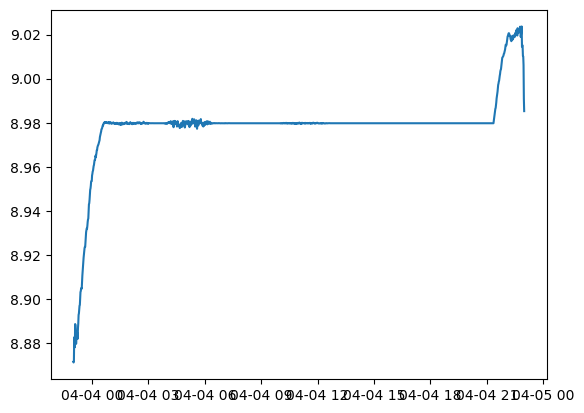

In [26]:
plt.plot(preds["computer"])